In [58]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from pprint import pprint

In [59]:
df = pd.read_csv('../Resources/cleaned_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Diagnosis,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [73]:
sleep_disorder_roundup=df["Sleep Disorder"].value_counts()
sleep_disorder_roundup

Sleep Disorder
No Diagnosis    219
Sleep Apnea      78
Insomnia         77
Name: count, dtype: int64

In [61]:
#set variables for pie chart breaking down sleep disorder

labels='No Diagnosis', 'Sleep Apnea', 'Insomnia'
sizes=[219, 78, 77]
colors=["orange", "purple", "lightcoral"]
explode=(0,0,0)

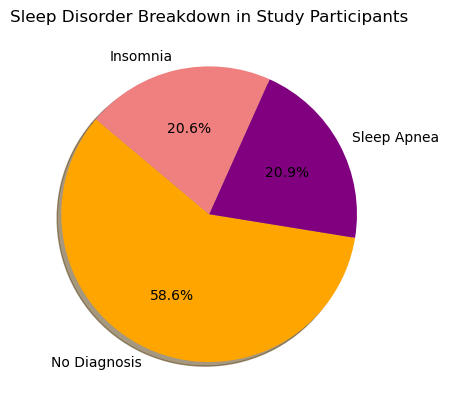

In [62]:
#plot showing sleep disorder breakdown

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sleep Disorder Breakdown in Study Participants")
plt.show()

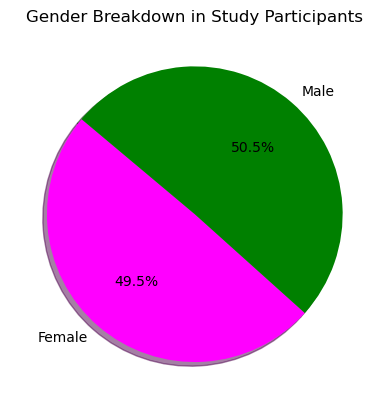

In [63]:
#Determine Gender Breakdown
gender_count=df["Gender"].value_counts()
gender_count

labels='Female', "Male"
sizes=[185, 189]
colors=["magenta", "green"]
explode=(0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Breakdown in Study Participants")
plt.show()

In [80]:
#Determine Age Breakdown Count
age_roundup=df["Age"].value_counts()
age_roundup



Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (374,) and arg 1 with shape (31, 14).

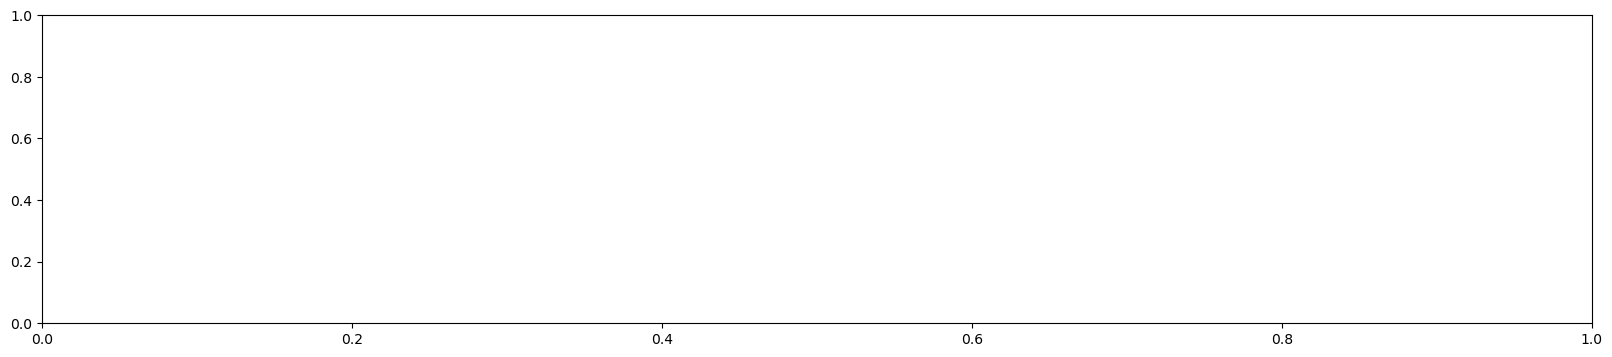

In [68]:
#make age bar graph
x_axis=np.arange(len(df))
tick_locations=[value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, , color="g", alpha=0.5, align="edge")
plt.xticks(tick_locations, df["Age"], rotation="vertical")
plt.show()

In [65]:
#Determine Blood Pressure

#define high blood pressure

#define low blood pressure

#define normal blood pressure

#add column that will state in string: HPB, LPB, NPB

#d etermine blood pressure count
blood_pressure_count=
blood_pressure_count

SyntaxError: invalid syntax (564495608.py, line 12)